In [ ]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1
!pip install -q supervision==0.19.0rc3

import cv2
import pandas as pd
import supervision as sv
import os
from pathlib import Path

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

# Se traen las librerias del google para realizar la conexion con el drive
from google.colab import files
from google.colab import drive
drive.mount("/content/drive") # Se realiza la peticion para conexion a la cuenta de google drive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.9/746.9 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 74.0 MB/s eta 0:00:00
   ━

[08/01/24 00:33:43] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=37643;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=96094;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.15.1 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

Mounted at /content/drive


In [ ]:
pathOrigen = r"/content/drive/MyDrive/images_test"
path_destino = r"/content/drive/MyDrive/image_results"

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")

In [ ]:
!pip install -q supervision==0.19.0rc3

**SAFETY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
safety_classes = [
    'Good lighting', 'Adequate lighting', 'Optimal lighting', 'Sufficient light',
    'Streetlights', 'Lamps', 'Lanterns', 'Light posts',
    'Outdoor floor lighting', 'Ground lighting', 'Pavement lighting', 'Floor illumination',
    'Light art installations', 'Light art', 'Luminous exhibitions', 'Artistic lighting installations',
    'Barrier-free', 'Obstacle-free', 'Unimpeded', 'Clear',
    'Bollards', 'Security posts', 'Pylons', 'Vertical barriers',
    'Fences', 'Grills', 'Barriers', 'Enclosures',
    'Barbed wire', 'Wire fence', 'Picket wire', 'Spiked wire',
    'No overgrown vegetation', 'Weed-free', 'No tall grass', 'No dense vegetation',
    'Signage', 'Markings', 'Signs', 'Indicators',
    'Orientation', 'Direction', 'Guidance', 'Reference',
    'Regulatory', 'Normative', 'Legal', 'Official',
    'Identification', 'Recognition', 'Credential', 'Accreditation',
    'Interpretative', 'Explanatory', 'Informative', 'Descriptive',
    'Lines of sight', 'Visual fields', 'Viewing angles', 'Clear views',
    'Linear benches', 'Continuous seating', 'Long benches', 'Linear seats',
    'Stages', 'Platforms', 'Risers', 'Podiums',
    'Portals', 'Entrances', 'Accesses', 'Main doors',
    'Canopies', 'Roofs', 'Sheds', 'Awnings'
]
model.set_classes(safety_classes)

In [ ]:
import os
import cv2
import pandas as pd
import supervision as sv

def procesar_imagenes_yolo(path_origen, path_destino):
    if not os.path.exists(path_destino):
        os.makedirs(path_destino)

    detecciones_lista = []
    summary_list = []

    imagenes = [f for f in os.listdir(path_origen) if os.path.isfile(os.path.join(path_origen, f))]

    for imagen in imagenes:
        imagen_path = os.path.join(path_origen, imagen)
        image = cv2.imread(imagen_path)

        results = model.infer(image)
        detections = sv.Detections.from_inference(results)

        BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
        LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

        annotated_image = image.copy()
        annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
        annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)

        imagen_destino_path = os.path.join(path_destino, imagen)
        cv2.imwrite(imagen_destino_path, annotated_image)

        detected_tags = []
        for detection in detections:
            x1, y1, x2, y2, confianza, etiqueta = detection
            detecciones_lista.append({
                'imagen': imagen,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2,
                'confianza': confianza,
                'etiqueta': etiqueta
            })
            # Assuming 'etiqueta' is a dictionary, let's extract the label
            if isinstance(etiqueta, dict):
                # Replace 'label' with the actual key that contains the label in your etiqueta dictionary
                label = etiqueta.get('label', str(etiqueta))
            else:
                label = str(etiqueta)
            detected_tags.append(label)

        summary_list.append({
            'imagen': imagen,
            'detected': ', '.join(set(detected_tags))  # Use set to remove duplicates
        })

    sv.plot_image(annotated_image, (10, 10))

    # Create and save the detailed DataFrame
    df_detecciones = pd.DataFrame(detecciones_lista)
    df_detecciones.to_csv(os.path.join(path_destino, 'ObjectDetected.csv'), index=False)

    # Create and save the summary DataFrame
    df_summary = pd.DataFrame(summary_list)
    df_summary.to_csv(os.path.join(path_destino, 'DetectionSummary.csv'), index=False)

    return df_detecciones, df_summary

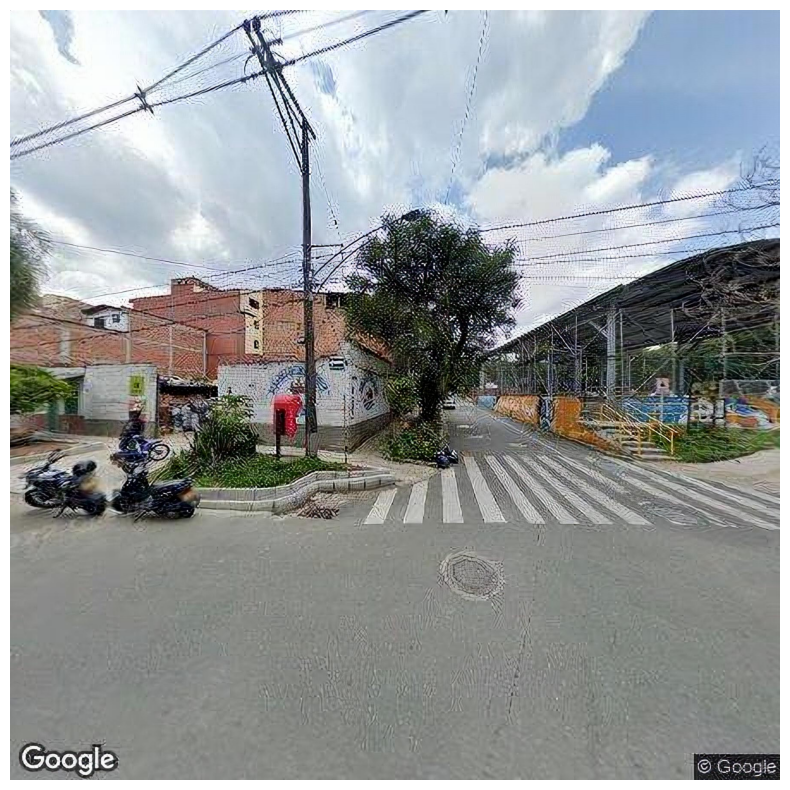

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

**PROXIMITY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
proximity_classes = [
    'Local shops', 'Local stores', 'Neighborhood stores', 'Nearby shops',
    'Public transport', 'Public transportation', 'Mass transit', 'Transit system',
    'Pedestrian connections', 'Walkways', 'Footpaths', 'Pedestrian pathways',
    'Residential areas', 'Housing areas', 'Living areas', 'Residential zones',
    'Commercial areas', 'Business areas', 'Shopping areas', 'Commercial zones',
    'Recreational areas', 'Leisure areas', 'Entertainment areas', 'Recreation zones',
    'Industrial areas', 'Factory areas', 'Manufacturing areas', 'Industrial zones',
    'Pedestrian areas', 'Walking areas', 'Pedestrian zones', 'Walkable areas',
    'Bike lanes', 'Bicycle lanes', 'Cycling paths', 'Bike paths',
    'Public transportation', 'Public transit', 'Mass transit', 'Transit system'
]
model.set_classes(proximity_classes)

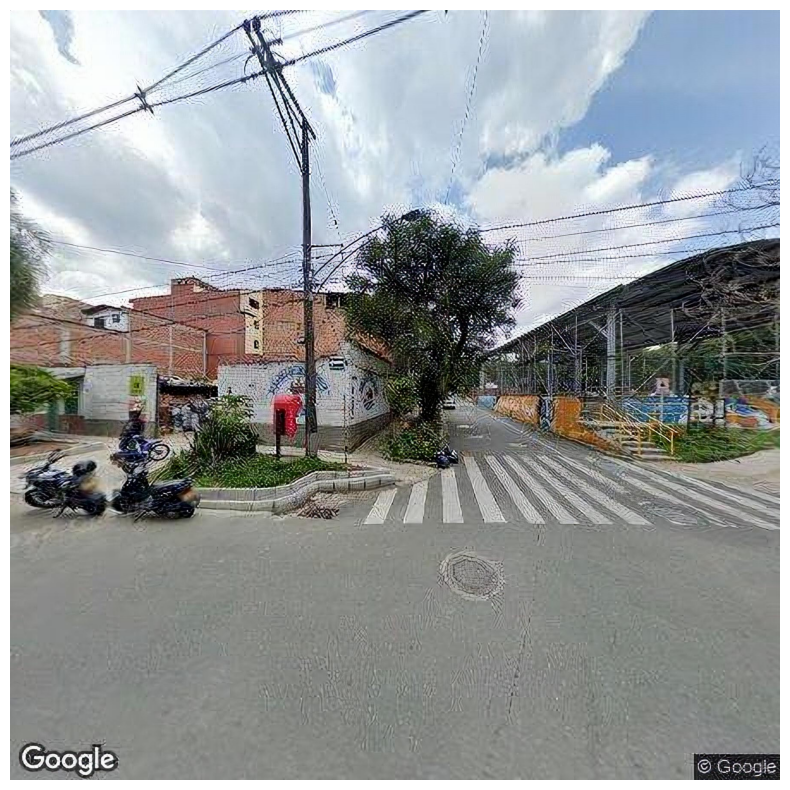

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

**AUTONOMY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
autonomy_classes = [
    'Urban elements', 'City elements', 'Urban features', 'City features',
    'Benches', 'Seats', 'Outdoor seating', 'Public benches',
    'Tables', 'Desks', 'Counters', 'Work tables',
    'Play areas', 'Playgrounds', 'Play spaces', 'Recreational areas',
    'Friendly toilets', 'Accessible toilets', 'Public toilets', 'Restrooms',
    'Different surfaces', 'Varied surfaces', 'Diverse surfaces', 'Multiple surfaces',
    'Grass', 'Lawn', 'Turf', 'Greenery',
    'Sand', 'Beach', 'Gravel', 'Loose soil',
    'Concrete', 'Cement', 'Pavement', 'Hard surface',
    'Universal accessibility', 'Inclusive accessibility', 'Accessible design', 'Universal design',
    'Children, elderly, baby strollers, wheelchairs, bicycles', 'Kids, seniors, strollers, wheelchairs, bikes', 'Young, old, strollers, wheelchairs, cycles', 'Infants, elders, prams, wheelchairs, bikes',
    'Ramps, sidewalks, bike lanes', 'Slopes, walkways, cycle paths', 'Inclines, footpaths, bike tracks', 'Gradients, pavements, cycling lanes',
    'Safety perception', 'Sense of security', 'Feeling of safety', 'Perceived safety',
    'Time', 'Duration', 'Period', 'Interval',
    'Activities', 'Tasks', 'Actions', 'Events',
    'Individual or group', 'Solo or group', 'Alone or group', 'Single or group'
]
model.set_classes(autonomy_classes)

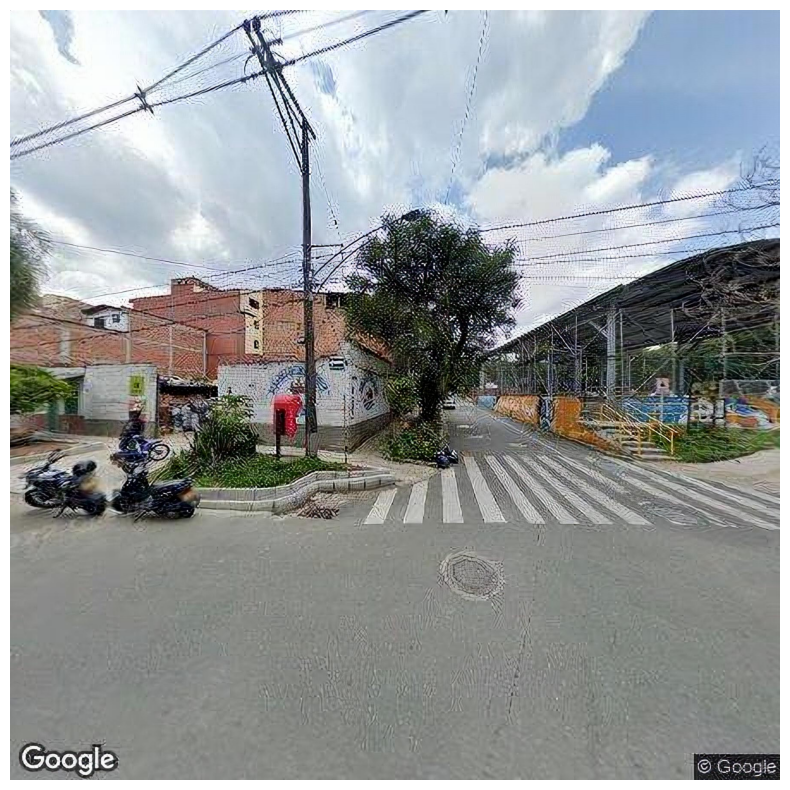

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

**VITALITY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
vitality_classes = [
    'Spaces for activities', 'Activity spaces', 'Areas for activities', 'Activity areas',
    'Meet', 'Gather', 'Assemble', 'Convene',
    'Socialize', 'Interact', 'Mingle', 'Network',
    'Ask for help', 'Request assistance', 'Seek help', 'Get help',
    'Rest', 'Relax', 'Take a break', 'Unwind',
    'Eat', 'Dine', 'Have a meal', 'Consume food',
    'Walk', 'Stroll', 'Saunter', 'Ambulate',
    'Shop', 'Purchase', 'Buy', 'Do shopping',
    'Play', 'Have fun', 'Recreate', 'Engage in games'
]
model.set_classes(vitality_classes)

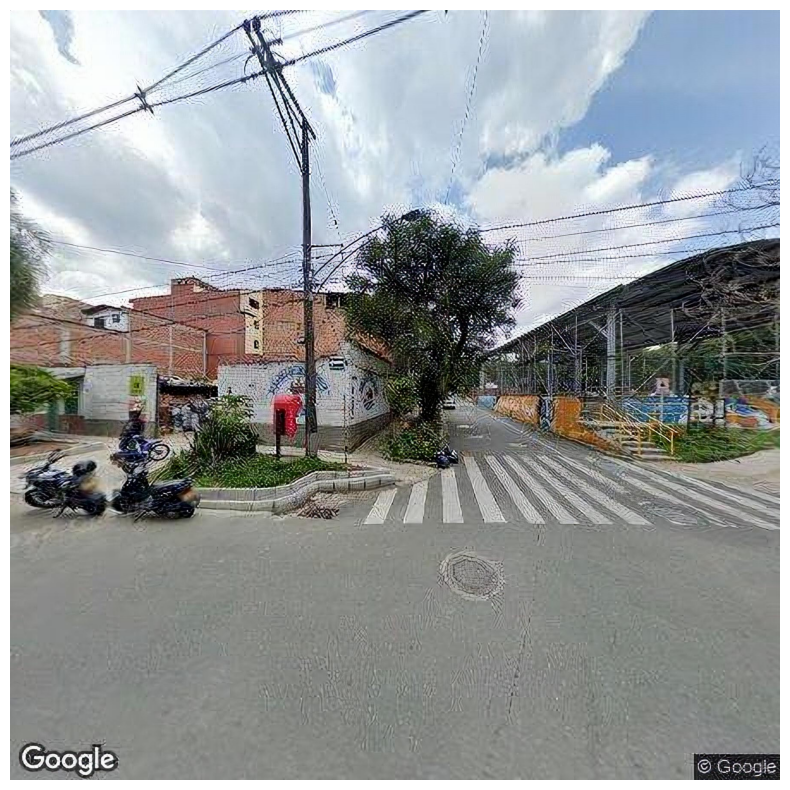

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

**DIVERSITY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
diversity_classes = [
    'Use', 'Usage', 'Utilization', 'Application',
    'Social', 'Societal', 'Community', 'Public',
    'Physical', 'Bodily', 'Material', 'Tangible',
    'Equipment', 'Facilities', 'Amenities', 'Infrastructure',
    'Parks', 'Green spaces', 'Recreation areas', 'Public gardens',
    'Hospitals', 'Medical centers', 'Healthcare facilities', 'Clinics',
    'Cultural centers', 'Community centers', 'Cultural facilities', 'Arts centers',
    'Public transport', 'Public transit', 'Mass transit', 'Transit system',
    'Subway', 'Underground', 'Metro', 'Tube',
    'Bus', 'Coach', 'Public bus', 'Transit bus',
    'Shared bicycle', 'Bike sharing', 'Public bicycle', 'Shared bike',
    'Social groups', 'Community groups', 'Societal groups', 'Public groups',
    'Age', 'Generation', 'Years', 'Age group',
    'Gender', 'Sex', 'Sexual identity', 'Gender identity',
    'Mobility', 'Movement', 'Transport', 'Locomotion'
]
model.set_classes(diversity_classes)

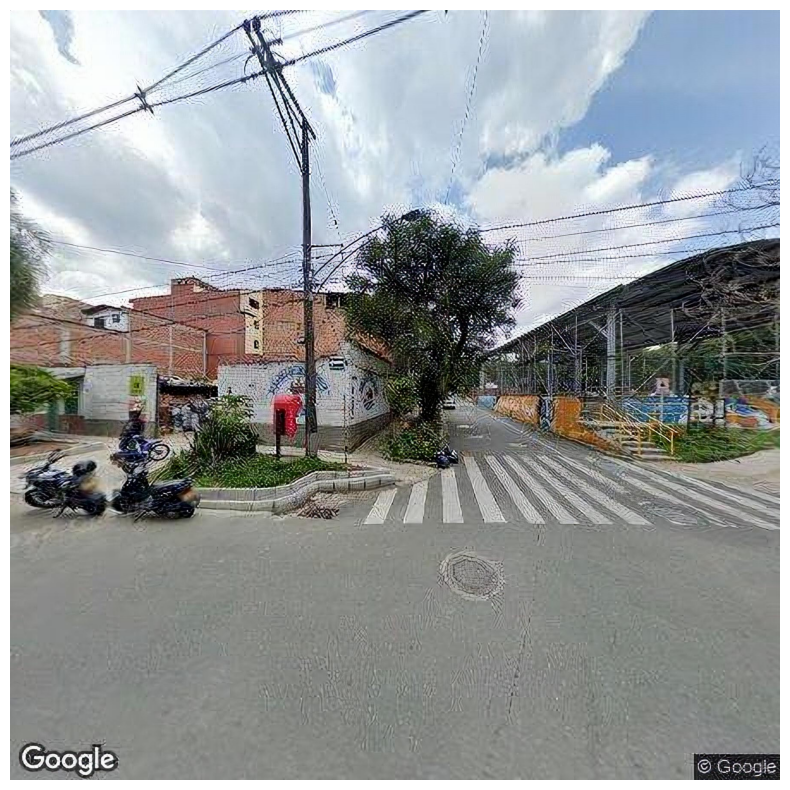

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

**REPRESENTATIVITY CATEGORIE**

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")
representativity_classes = [
    'Social engagement', 'Community involvement', 'Public participation', 'Civic engagement',
    'Outdoor living rooms', 'Open-air lounges', 'Outside sitting areas', 'Outdoor lounges',
    'Pocket parks', 'Mini parks', 'Small parks', 'Tiny parks',
    'Fountains', 'Water features', 'Water fountains', 'Springs',
    'Participation', 'Involvement', 'Engagement', 'Participation',
    'Communities', 'Groups', 'Societies', 'Neighborhoods',
    'Social groups', 'Societal groups', 'Community groups', 'Public groups',
    'History', 'Heritage', 'Past', 'Legacy',
    'Monuments', 'Memorials', 'Statues', 'Landmarks',
    'Street names', 'Road names', 'Avenue names', 'Boulevard names',
    'Memory', 'Remembrance', 'Recollection', 'Commemoration',
    'Murals', 'Wall paintings', 'Public art', 'Street art',
    'Urban art', 'City art', 'Street art', 'Metropolitan art'
]
model.set_classes(representativity_classes)

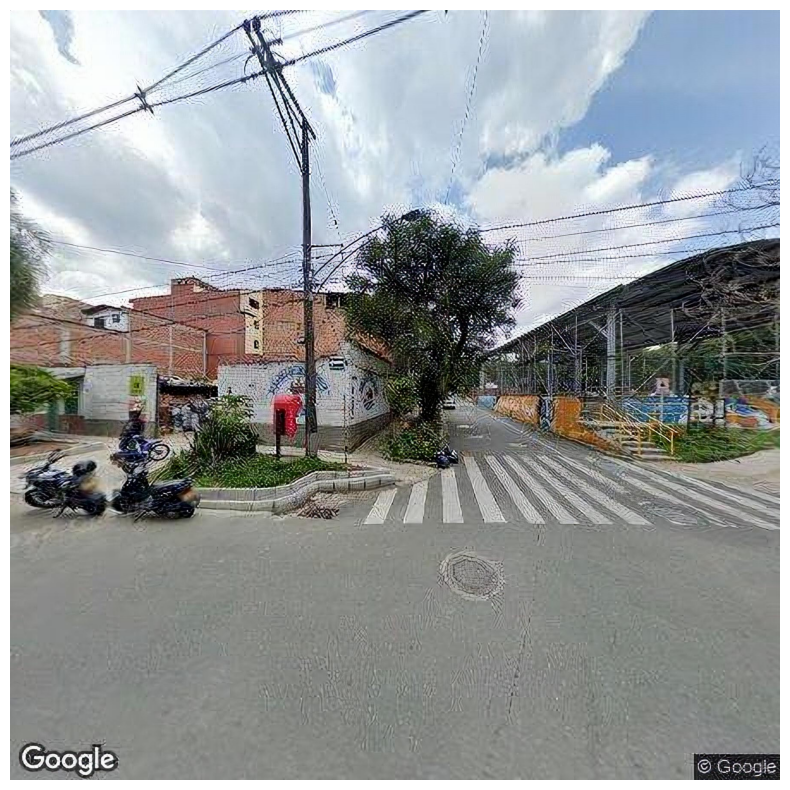

In [ ]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

In [ ]:
import pandas as pd

# Cargar los archivos CSV
object_detected_df = pd.read_csv('/content/drive/MyDrive/image_results/autonomy/ObjectDetected.csv')
detection_summary_df = pd.read_csv('/content/drive/MyDrive/image_results/diversity/ObjectDetected.csv')

# Eliminar duplicados basados en la columna 'imagen' en el segundo CSV
detection_summary_df = detection_summary_df.drop_duplicates(subset=['imagen'])

# Realizar el merge basado en la columna 'imagen'
merged_df = pd.merge(object_detected_df, detection_summary_df, on='imagen', how='outer', suffixes=('', '_y'))

# Eliminar columnas duplicadas que puedan surgir del merge
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Guardar el dataframe actualizado en un nuevo archivo CSV en una ruta específica
ruta_especifica = '/content/drive/MyDrive/image_results/Updated_ObjectDetected.csv'
merged_df.to_csv(ruta_especifica, index=False)

In [ ]:
import pandas as pd
import os

# Ruta del archivo resultante del último código
initial_file = '/content/drive/MyDrive/image_results/autonomy/ObjectDetected.csv'
# Diccionario de categorías y sus archivos CSV correspondientes
categories = {
    'diversity': '/content/drive/MyDrive/image_results/diversity/ObjectDetected.csv',
    'proximity': '/content/drive/MyDrive/image_results/proximity/ObjectDetected.csv',
    'representation': '/content/drive/MyDrive/image_results/representativity/ObjectDetected.csv',
    'safety': '/content/drive/MyDrive/image_results/safety/ObjectDetected.csv',
    'vitality': '/content/drive/MyDrive/image_results/vitality/ObjectDetected.csv'
}

# Cargar el archivo inicial
combined_df = pd.read_csv(initial_file)

# Procesar cada categoría y su archivo CSV
for category, det_file in categories.items():
    if os.path.getsize(det_file) > 0:  # Verificar si el archivo no está vacío
        try:
            # Cargar el archivo CSV adicional
            detection_summary_df = pd.read_csv(det_file)

            if not detection_summary_df.empty:
                # Eliminar duplicados basados en la columna 'imagen'
                detection_summary_df = detection_summary_df.drop_duplicates(subset=['imagen'])

                # Realizar el merge basado en la columna 'imagen'
                combined_df = pd.merge(combined_df, detection_summary_df, on='imagen', how='outer')

                # Renombrar las columnas adicionales para reflejar la categoría, evitando sufijos duplicados
                for column in detection_summary_df.columns:
                    if column != 'imagen':
                        combined_df.rename(columns={column: f"{category}_{column}"}, inplace=True)
            else:
                print(f"El archivo {det_file} está vacío y no se procesará.")
        except pd.errors.EmptyDataError:
            print(f"El archivo {det_file} no tiene datos y no se procesará.")
    else:
        print(f"El archivo {det_file} está vacío y no se procesará.")

# Guardar el dataframe final actualizado en un nuevo archivo CSV en una ruta específica
ruta_especifica = '/content/drive/MyDrive/image_results/Final_Combined_ObjectDetected.csv'
combined_df.to_csv(ruta_especifica, index=False)


El archivo /content/drive/MyDrive/image_results/proximity/ObjectDetected.csv no tiene datos y no se procesará.
El archivo /content/drive/MyDrive/image_results/representativity/ObjectDetected.csv no tiene datos y no se procesará.
El archivo /content/drive/MyDrive/image_results/vitality/ObjectDetected.csv no tiene datos y no se procesará.
